## 훈련과정 : R·파이썬 기반 빅데이터 분석 전문가 양성과정
- 교과목 평가 : 빅데이터 분석결과 시각화
- 성명 : 호지수
- 점수 : 50점(1번 틀림, 2번 보류, 3(20),4(10),5(20)번 맞음, 6번 보류)

#### Q1. 'auto-mpg.csv' 데이터셋을 df 이름으로 불러온 후 아래 사항을 수행하세요. --- (10점)
- df.columns = ['mpg','cylinders','displacement','horsepower','weight','model year','origin','name']
- mpg , cylinders, weight, displacement, acceleration 칼럼만을 선택해서 df_s 이름으로 저장하고 처음 5개행을 출력하세요.
- df_s에서 mpg와 각 칼럼간의 산점도를 그리고 음의 상관관계가 있는 변수를 기술하세요.

,mpg,cylinders,weight,displacement,acceleration
0,15.0,8,3693.0,350.0,11.5
1,18.0,8,3436.0,318.0,11.0
2,16.0,8,3433.0,304.0,12.0
3,17.0,8,3449.0,302.0,10.5
4,15.0,8,4341.0,429.0,10.0


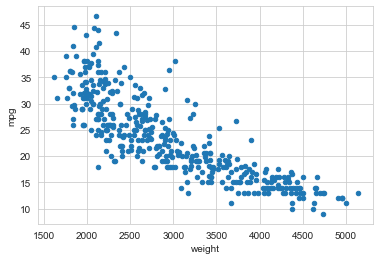

In [155]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('../auto-mpg.csv')
df.columns = ['mpg','cylinders','displacement','horsepower',
              'weight','acceleration','model year','origin','name']
df_s = df[['mpg','cylinders','weight','displacement','acceleration' ]]
display(df_s.head())
df_s.plot(x='weight', y='mpg', kind='scatter')

,mpg,cylinders,weight,displacement,acceleration
mpg,1.000000,-0.775412,-0.831558,-0.803972,0.419133
cylinders,-0.775412,1.000000,0.896623,0.950718,-0.503016
weight,-0.831558,0.896623,1.000000,0.932957,-0.416488
displacement,-0.803972,0.950718,0.932957,1.000000,-0.542083
acceleration,0.419133,-0.503016,-0.416488,-0.542083,1.000000


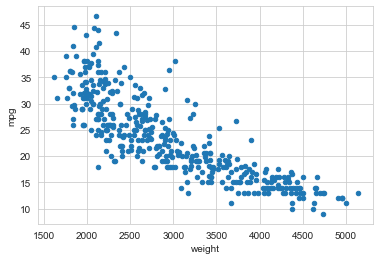

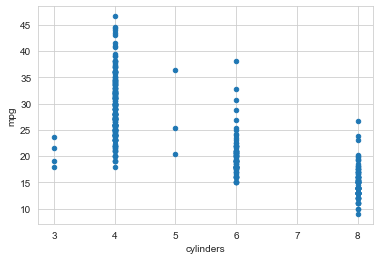

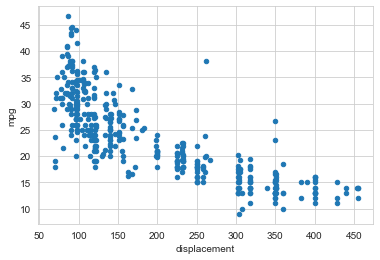

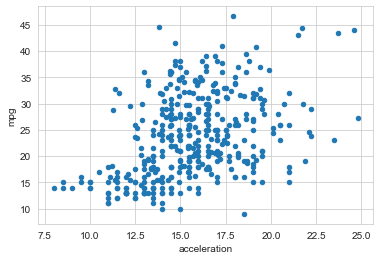

In [157]:
# 풀지 않은 추가 답안

display(df_s.corr())
df_s.plot(x='weight',y='mpg', kind='scatter')
df_s.plot(x='cylinders',y='mpg', kind='scatter')
df_s.plot(x='displacement',y='mpg', kind='scatter')
df_s.plot(x='acceleration',y='mpg', kind='scatter')
# 음의 상관관계 : cylinders, weight, displacement

#### Q2. df_s의 각 컬럼간의 상관관계에 대한 시각화를 아래와 같이 수행하세요. (10점)
- 2개의 행과 2개의 열을 가진 subplots를 이용해서 표현
- Seaborn의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현

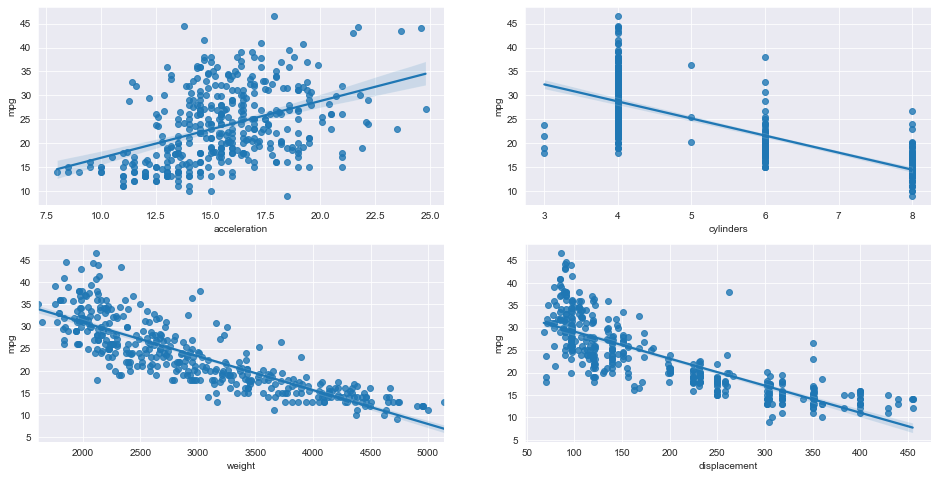

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig, axs = plt.subplots(figsize=(16,8), ncols=2, nrows=2)  # 2행 2열 차트를 만든다.
lm_features = ['acceleration', 'cylinders', 'weight', 'displacement']
for i, feature in enumerate(lm_features): # 인덱스와 같이 작동하는 것
    row = int(i/2) #처음 인덱스는 0
    col = i%2      # 컬럼도 처음에 0
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature, y='mpg', data=df_s, ax=axs[row][col])

#### Q3. auto_mpg.csv 파일을 df 이름으로 불러와서 horsepower열에 대한 히스토그램을 그린 후 출력하세요.(20점)
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name']

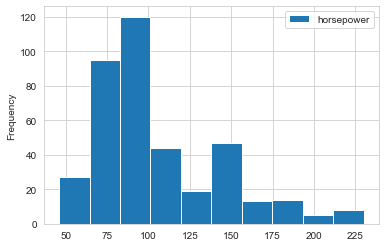

In [142]:
df = pd.read_csv('../auto-mpg.csv', header=None)
df.columns = ['mpg','cylinders','displacement','horsepower','weight', 'acceleration','model year','origin','name']
df_h = df.loc[:,['horsepower']]
# display(df_h['horsepower'].unique())  # '?' 하나가 있어서 제거하기 위해 작업함
df_h.replace('?', np.nan, inplace=True)
df_h.fillna(df_h.mean(), inplace=True)
df_fh=df_h.astype('float')
df_fh.plot(kind='hist')

#### Q4. 아래 사항을 준수하여 막대 그래프(barplot)를 출력하세요. (10점)
- Seaborn 제공 데이터셋 가져오기 : titanic = sns.load_dataset('titanic')
- sns.barplot 이용
- 스타일 테마 설정 : sns.set_style('whitegrid')
- 그래프 객체 생성 : figure에 3개의 서브 플롯을 생성
- x축, y축에 변수 할당 : x='sex', y='survived', data=titanic, ax=ax1
- x축, y축에 변수 할당하고 hue 옵션 추가 : x='sex', y='survived', hue='class', data=titanic, ax=ax2
- x축, y축에 변수 할당하고 hue 옵션을 추가하여 누적 출력 : x='sex', y='survived', hue='class', dodge=False, data=titanic, ax=ax3
- 차트 제목 표시\
ax1.set_title('titanic survived - sex')\
ax2.set_title('titanic survived - sex/class')\
ax3.set_title('titanic survived - sex/class(stacked)')

Text(0.5, 1.0, 'titanic survived - sex/class(stacked)')

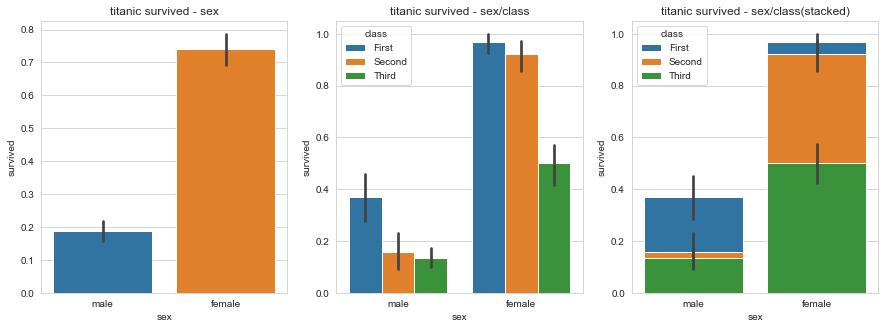

In [152]:
titanic = sns.load_dataset('titanic')
sns.set_style('whitegrid')

fig = plt.figure(figsize=(15,5))
ax1=fig.add_subplot(1,3,1)
ax2=fig.add_subplot(1,3,2)
ax3=fig.add_subplot(1,3,3)

#x축, y축 변수 할당
sns.barplot(x='sex', y='survived', data=titanic, ax=ax1)

# hue 옵션에 'who' 추가
sns.barplot(x='sex', y='survived', hue='class', data=titanic, ax=ax2)

# dodge = False 옵션 추가 (축 방향으로 분리하지 않고 누적 그래프 출력)
sns.barplot(x='sex', y='survived', hue='class', dodge=False, data=titanic, ax=ax3)

ax1.set_title('titanic survived - sex')
ax2.set_title('titanic survived - sex/class')
ax3.set_title('titanic survived - sex/class(stacked)')

#### Q5. 아래 사항을 준수하여 빈도 그래프(countplot)를 출력하세요.(20점)
- Seaborn 제공 데이터셋 가져오기 : titanic = sns.load_dataset('titanic')
- sns.countplot 이용
- 스타일 테마 설정 : sns.set_style('whitegrid')
- 그래프 객체 생성 : figure에 3개의 서브 플롯을 생성
- 기본값 : x='class', palette='Set1', data=titanic, ax=ax1
- hue 옵션에 'who' 추가  : x='class', hue='who', palette='Set2', data=titanic, ax=ax2
- dodge=False 옵션 추가 : x='class', hue='who', palette='Set3', dodge=False, data=titanic, ax=ax3
- 차트 제목 표시\
ax1.set_title('titanic class')\
ax2.set_title('titanic class - who')\
ax3.set_title('titanic class - who(stacked)')

Text(0.5, 1.0, 'titanic class - who(stacked)')

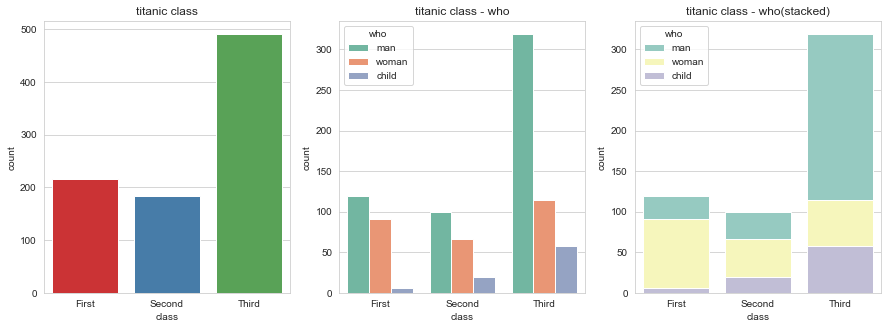

In [153]:
titanic = sns.load_dataset('titanic')
sns.set_style('whitegrid')

fig = plt.figure(figsize=(15,5))
ax1=fig.add_subplot(1,3,1)
ax2=fig.add_subplot(1,3,2)
ax3=fig.add_subplot(1,3,3)

# 기본값
sns.countplot(x='class', palette ='Set1', data=titanic, ax=ax1)

# hue 옵션에 'who' 추가
sns.countplot(x='class', hue ='who', palette ='Set2', data=titanic, ax=ax2)

# # dodge = False 옵션 추가 (축 방향으로 분리하지 않고 누적 그래프 출력)
sns.countplot(x='class', hue='who', palette='Set3', dodge=False, data=titanic, ax=ax3)

ax1.set_title('titanic class')
ax2.set_title('titanic class - who')
ax3.set_title('titanic class - who(stacked)')

#### Q6. 타이타닉 생존자 예측 모델 개발을 위한 최종 선정 변수와 그 이유를 논하세요. (20점)
 - titanic3 분석용 데이터에 대한 탐색적 분석 결과 반영

1. fare 
2. age 
3. sex 
4. survived
5. pclass 

결론 : (금액, 나이, 성별, 생존률, 등급) 변수를 통해, 연산 메소드를 이용하여 데이터들의 상관관계를 해석할 수 있다.
부연설명
 - 전처리를 통해 가공된 데이터를 corr()함수로 분석해 보면 sex-survived 가 가장 큰 음의 상관관계를 나타낸다고 해석할 수 있다. 
  (의미상 pclass - fare 관계는 제외)
 - 이는, sex-survived 가 서로 가장 밀접한 영향을 미친다고 볼 수 있으며, 최종 선정 변수로 채택된 이유로 적합하다고 판단된다.
 - 추가적인 fare, age, pclass 데이터는 sex-survived 관계 외에도 다양한 변수를 고려해야 한다는 의미로 사용될 수 있다.
   --> 각 데이터가 생존률에 미치는 영향을 가중치로 두어 5가지 변수를 사용하는 방법도 사용 가능